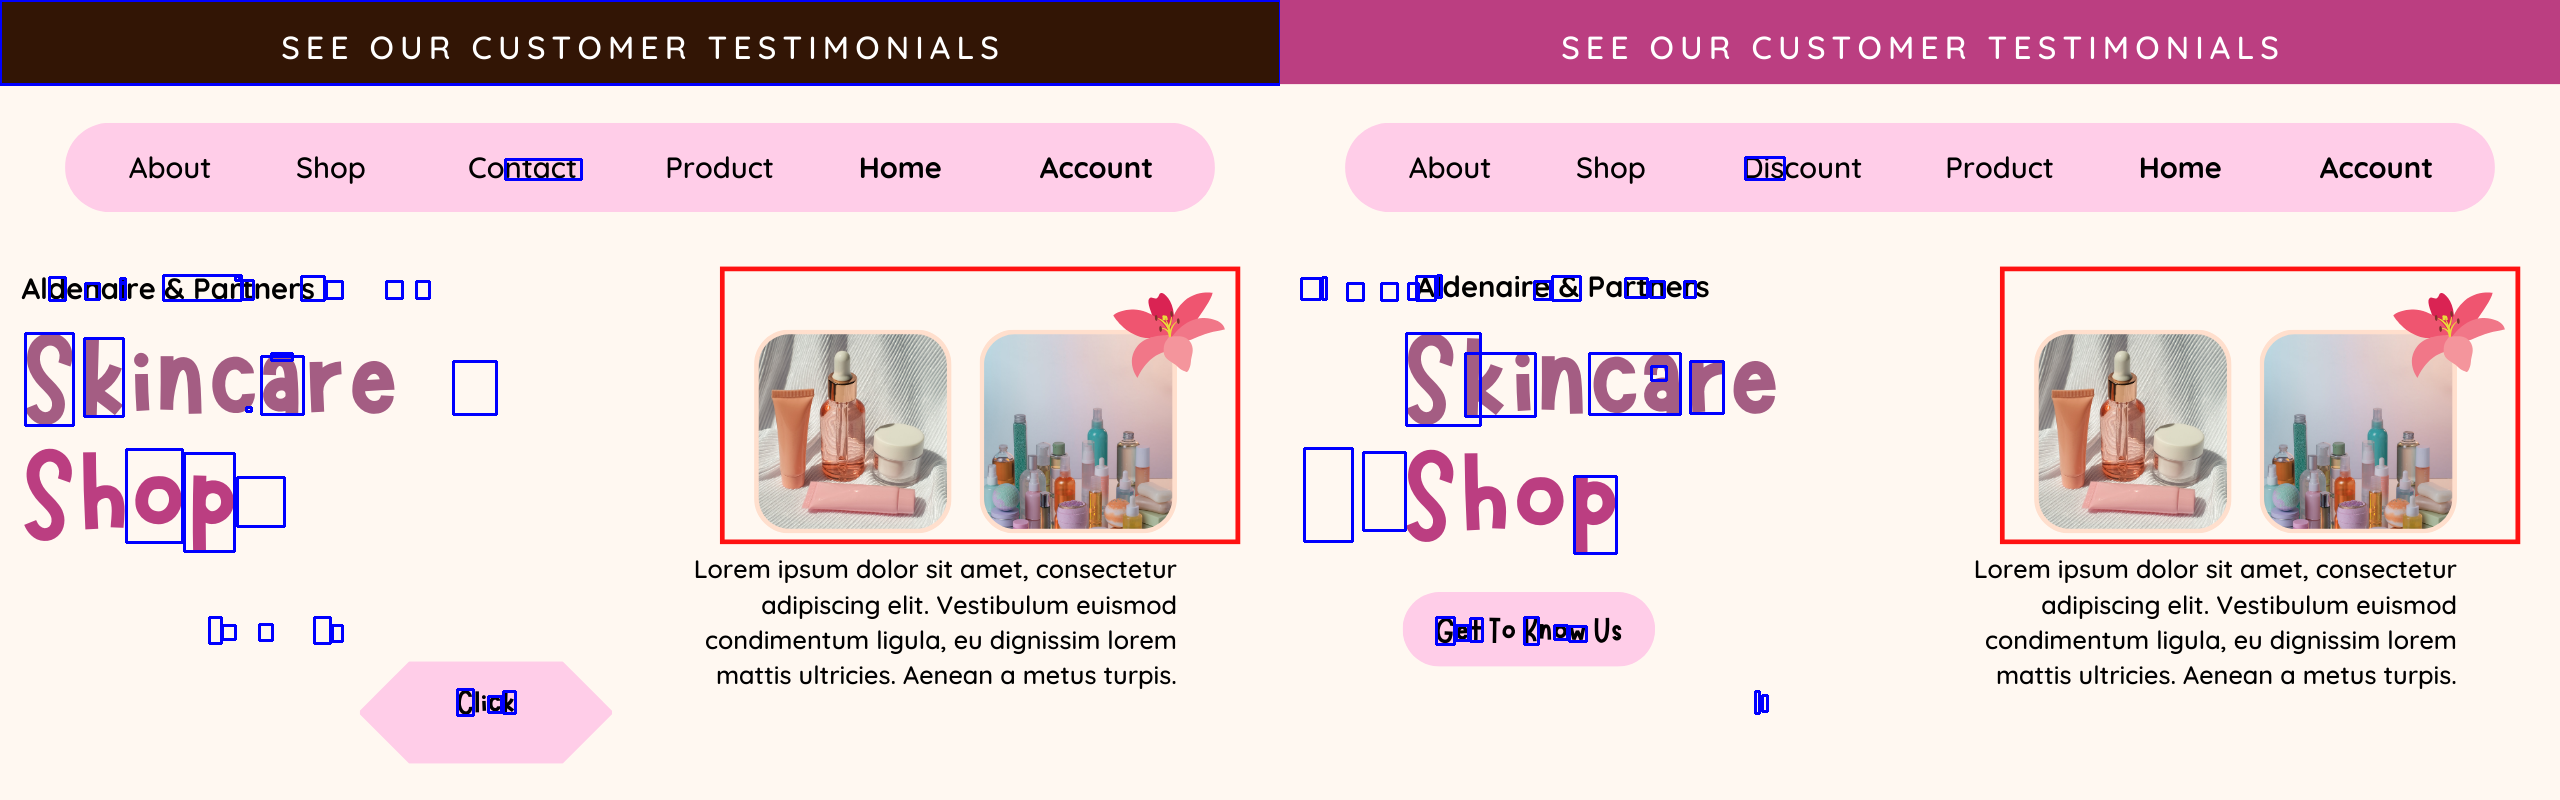

In [7]:
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

# Define the list of bounding boxes
bounding_boxes = [
    {"height": 16, "left": 488, "top": 696, "width": 13},
    {"height": 16, "left": 482, "top": 695, "width": 5},
    {"height": 22, "left": 503, "top": 691, "width": 12},
    {"height": 22, "left": 475, "top": 691, "width": 4},
    {"height": 26, "left": 457, "top": 689, "width": 16},
    {"height": 15, "left": 289, "top": 626, "width": 17},
    {"height": 16, "left": 332, "top": 625, "width": 10},
    {"height": 14, "left": 274, "top": 625, "width": 13},
    {"height": 14, "left": 222, "top": 625, "width": 13},
    {"height": 15, "left": 176, "top": 625, "width": 12},
    {"height": 16, "left": 259, "top": 624, "width": 13},
    {"height": 23, "left": 190, "top": 618, "width": 12},
    {"height": 26, "left": 314, "top": 617, "width": 16},
    {"height": 27, "left": 244, "top": 617, "width": 14},
    {"height": 26, "left": 209, "top": 617, "width": 12},
    {"height": 27, "left": 156, "top": 617, "width": 18},
    {"height": 49, "left": 237, "top": 477, "width": 47},
    {"height": 77, "left": 294, "top": 476, "width": 42},
    {"height": 98, "left": 184, "top": 453, "width": 50},
    {"height": 78, "left": 83, "top": 452, "width": 42},
    {"height": 93, "left": 126, "top": 449, "width": 56},
    {"height": 93, "left": 24, "top": 448, "width": 48},
    {"height": 4, "left": 246, "top": 407, "width": 5},
    {"height": 14, "left": 371, "top": 366, "width": 15},
    {"height": 53, "left": 453, "top": 361, "width": 43},
    {"height": 52, "left": 410, "top": 361, "width": 33},
    {"height": 58, "left": 261, "top": 356, "width": 42},
    {"height": 61, "left": 309, "top": 353, "width": 91},
    {"height": 7, "left": 271, "top": 353, "width": 21},
    {"height": 63, "left": 185, "top": 353, "width": 70},
    {"height": 78, "left": 84, "top": 338, "width": 39},
    {"height": 92, "left": 126, "top": 333, "width": 74},
    {"height": 92, "left": 25, "top": 333, "width": 48},
    {"height": 16, "left": 128, "top": 283, "width": 10},
    {"height": 16, "left": 120, "top": 283, "width": 5},
    {"height": 17, "left": 101, "top": 283, "width": 16},
    {"height": 16, "left": 85, "top": 283, "width": 14},
    {"height": 17, "left": 67, "top": 283, "width": 16},
    {"height": 17, "left": 416, "top": 281, "width": 13},
    {"height": 16, "left": 404, "top": 281, "width": 11},
    {"height": 17, "left": 386, "top": 281, "width": 16},
    {"height": 16, "left": 370, "top": 281, "width": 14},
    {"height": 17, "left": 326, "top": 281, "width": 16},
    {"height": 18, "left": 254, "top": 281, "width": 16},
    {"height": 19, "left": 242, "top": 280, "width": 11},
    {"height": 19, "left": 345, "top": 278, "width": 22},
    {"height": 4, "left": 120, "top": 278, "width": 5},
    {"height": 21, "left": 21, "top": 278, "width": 19},
    {"height": 23, "left": 49, "top": 277, "width": 16},
    {"height": 22, "left": 42, "top": 277, "width": 4},
    {"height": 24, "left": 301, "top": 276, "width": 23},
    {"height": 24, "left": 272, "top": 276, "width": 28},
    {"height": 4, "left": 235, "top": 276, "width": 4},
    {"height": 24, "left": 136, "top": 276, "width": 19},
    {"height": 25, "left": 163, "top": 275, "width": 78},
    {"height": 22, "left": 157, "top": 275, "width": 4},
    {"height": 20, "left": 505, "top": 159, "width": 76},
    {"height": 22, "left": 465, "top": 157, "width": 39},
    {"height": 84, "left": 0, "top": 0, "width": 1280}
]

# Split bounding boxes into two lists
bounding_boxes_image1 = [bbox for i, bbox in enumerate(bounding_boxes) if i % 2 == 0]
bounding_boxes_image2 = [bbox for i, bbox in enumerate(bounding_boxes) if i % 2 != 0]

# Define image URLs
image_url1 = 'https://i.postimg.cc/XJZrvXqy/3.png'  # Replace with the actual URL of the first image
image_url2 = 'https://i.postimg.cc/KzdR3F3p/4.png'  # Replace with the actual URL of the second image

# Function to download image from URL
def download_image(url):
    resp = urllib.request.urlopen(url)
    img_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
    image = cv2.imdecode(img_array, -1)
    return image

# Download the images
image1 = download_image(image_url1)
image2 = download_image(image_url2)

# Check if images are loaded properly
if image1 is None:
    print(f"Failed to load image from {image_url1}")
else:
    # Draw each bounding box on the first image
    for bbox in bounding_boxes_image1:
        x1 = bbox['left']
        y1 = bbox['top']
        x2 = x1 + bbox['width']
        y2 = y1 + bbox['height']

        color = (255, 0, 0)  # BGR color format (blue)
        thickness = 2  # Line thickness
        cv2.rectangle(image1, (x1, y1), (x2, y2), color, thickness)

if image2 is None:
    print(f"Failed to load image from {image_url2}")
else:
    # Draw each bounding box on the second image
    for bbox in bounding_boxes_image2:
        x1 = bbox['left']
        y1 = bbox['top']
        x2 = x1 + bbox['width']
        y2 = y1 + bbox['height']

        color = (255, 0, 0)  # BGR color format (blue)
        thickness = 2  # Line thickness
        cv2.rectangle(image2, (x1, y1), (x2, y2), color, thickness)

# Concatenate the images horizontally
combined_image = np.hstack((image1, image2))

# Display the combined image
cv2_imshow(combined_image)
